In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/aptos2019-blindness-detection/train.csv
/kaggle/input/aptos2019-blindness-detection/sample_submission.csv
/kaggle/input/aptos2019-blindness-detection/test.csv
/kaggle/input/aptos2019-blindness-detection/test_images/42bef0737ac1.png
/kaggle/input/aptos2019-blindness-detection/test_images/6d51db325a98.png
/kaggle/input/aptos2019-blindness-detection/test_images/95485b752436.png
/kaggle/input/aptos2019-blindness-detection/test_images/cd45c48db97d.png
/kaggle/input/aptos2019-blindness-detection/test_images/643ff5d1f90f.png
/kaggle/input/aptos2019-blindness-detection/test_images/d9b846ab7972.png
/kaggle/input/aptos2019-blindness-detection/test_images/e1a9cafeb308.png
/kaggle/input/aptos2019-blindness-detection/test_images/80ffe924f95b.png
/kaggle/input/aptos2019-blindness-detection/test_images/c7c003cdaaba.png
/kaggle/input/aptos2019-blindness-detection/test_images/d1a276276890.png
/kaggle/input/aptos2019-blindness-detection/test_images/21d65a5b8d67.png
/kaggle/input/aptos2019-

In [2]:
!ls /kaggle/input/aptos2019-blindness-detection


sample_submission.csv  test.csv  test_images  train.csv  train_images


In [3]:
import os
root = '/kaggle/input/aptos2019-blindness-detection/'
train_img_path = os.path.join(root,'train_images')
train_path = os.path.join(root,'train.csv')
test_img_path = os.path.join(root,'test_images')
test_path = os.path.join(root,'test.csv')

In [4]:
train_img_path

'/kaggle/input/aptos2019-blindness-detection/train_images'

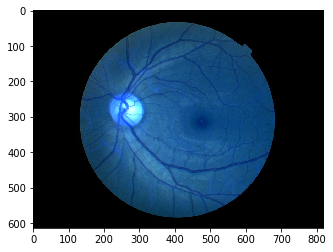

In [5]:
import cv2 as cv
import matplotlib.pyplot as plt
sample_img = os.path.join(train_img_path, '9c6512166557.png')
img = cv.imread(sample_img)
plt.imshow(img)

In [6]:
sample_img

'/kaggle/input/aptos2019-blindness-detection/train_images/9c6512166557.png'

In [7]:
img

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

Populating the interactive namespace from numpy and matplotlib


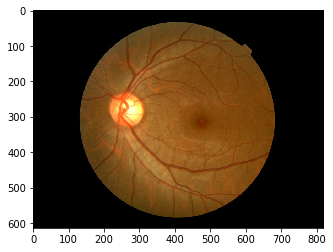

In [8]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread(sample_img)
imgplot = plt.imshow(img)
plt.show()

In [9]:
img.shape

(614, 819, 3)

The image is normalized now

In [10]:
img

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [11]:
import cv2
resz_img = cv2.resize(img, (1050,1050), interpolation=cv2.INTER_AREA )
resz_img.shape

(1050, 1050, 3)

In [12]:
imgplot = plt.imshow(resz_img)
plt.show()

In [13]:
#plt.imshow('/kaggle/input/aptos2019-blindness-detection/train_images/6630f8675a97.png')# Must read file first

In [14]:
from PIL import Image

img = Image.open(sample_img)
img.show()

In [15]:
img

In [16]:
import pandas as pd
train_data = pd.read_csv(train_path)
train_data.head()

id_code  diagnosis
0  000c1434d8d7          2
1  001639a390f0          4
2  0024cdab0c1e          1
3  002c21358ce6          0
4  005b95c28852          0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa23c712d30>]],
      dtype=object)

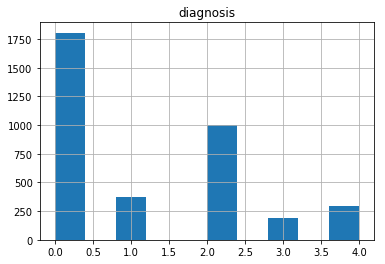

In [17]:
train_data.hist()

In [18]:
data_0 = train_data[train_data.diagnosis==0]


    
    

In [19]:
data_0.head()

id_code  diagnosis
3   002c21358ce6          0
4   005b95c28852          0
6   0097f532ac9f          0
10  00cc2b75cddd          0
12  00f6c1be5a33          0

In [20]:
data_0.iloc[0]['id_code']

'002c21358ce6'

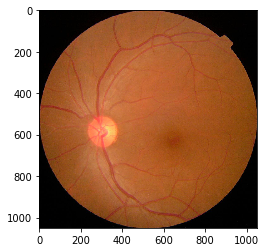

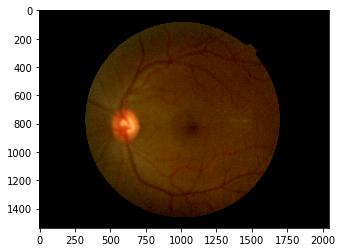

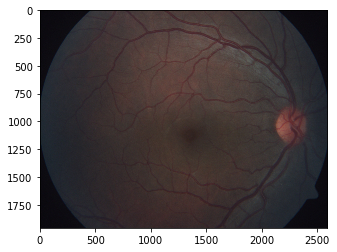

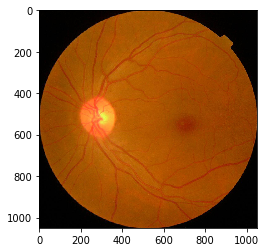

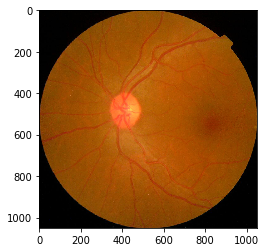

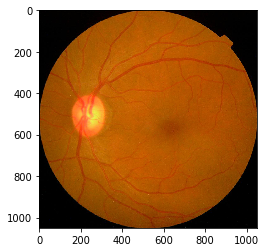

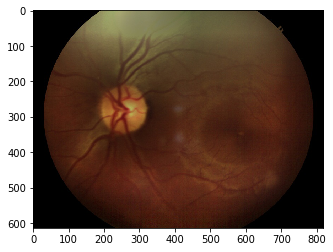

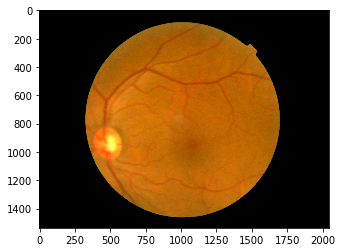

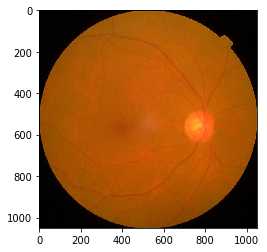

In [21]:
# Let's visualize the first 10 images

for i in range(10):
    d = data_0.iloc[i]
    imgplot = plt.imshow(mpimg.imread(os.path.join(train_img_path, d['id_code']+'.png')))
    plt.show()


Let's do it for all classes

0


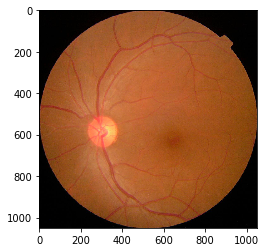

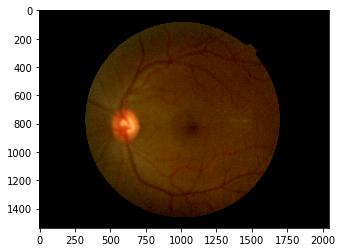

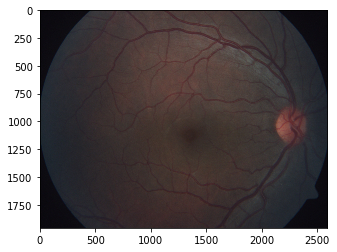

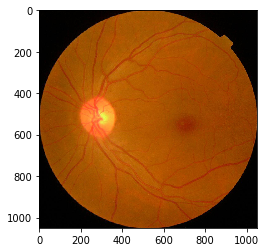

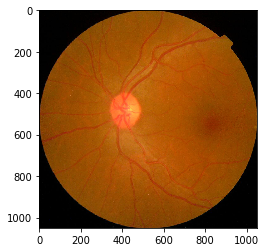

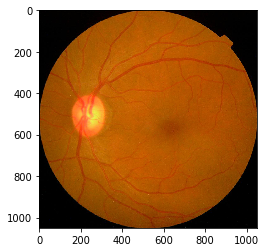

1


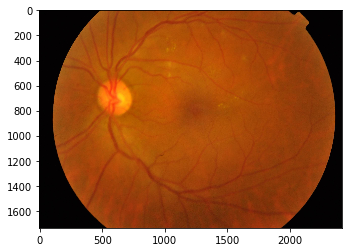

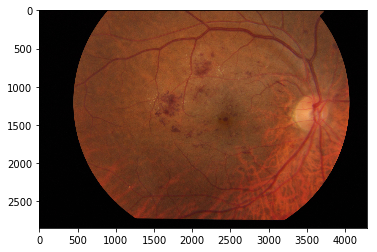

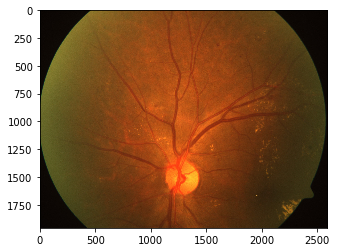

2


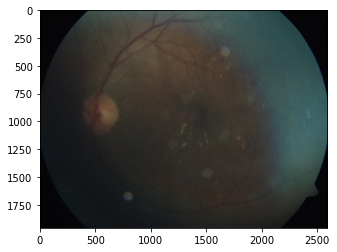

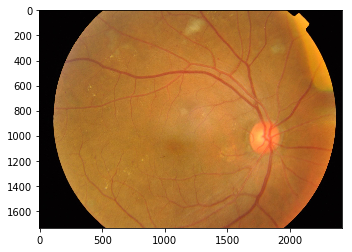

3


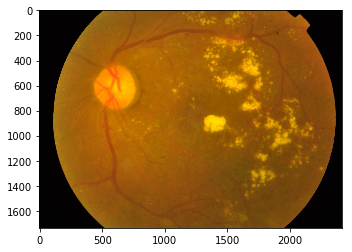

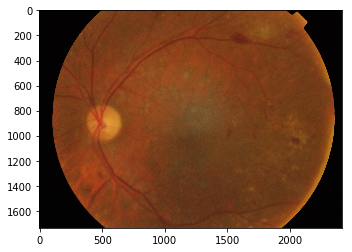

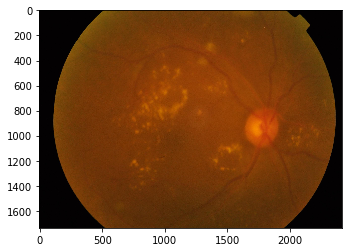

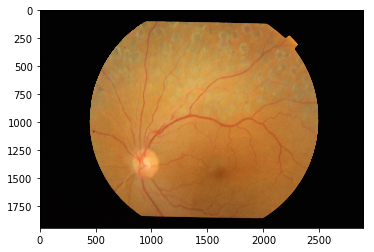

4


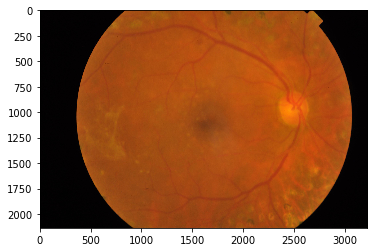

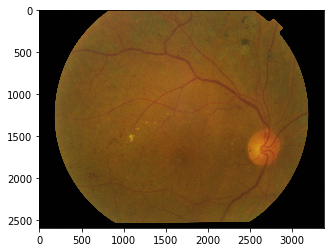

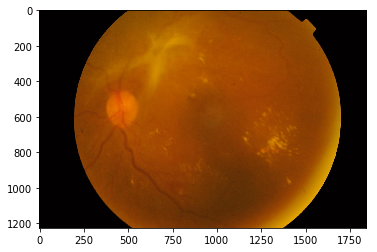

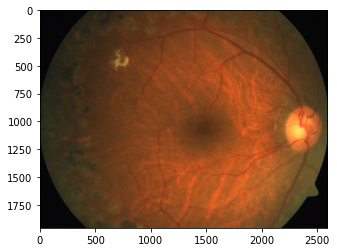

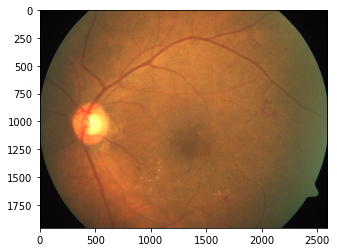

In [22]:

diag_grps = train_data.groupby('diagnosis')#dict(list(train_data.groupby('diagnosis')))
for name, grp in diag_grps:
    print(name)
    for i in range(6):
        imgplot = plt.imshow(mpimg.imread(os.path.join(train_img_path, grp.iloc[i]['id_code']+'.png')))
        plt.show()

0


1


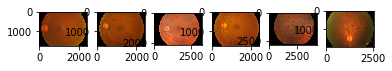

2


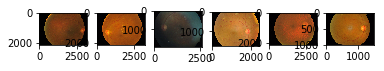

3


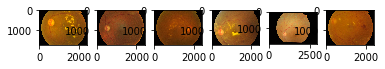

4


In [23]:
n_diag_cls = train_data.diagnosis.nunique()
n_samples_cls = 6
diag_grps = train_data.groupby('diagnosis')#dict(list(train_data.groupby('diagnosis')))
for name, grp in diag_grps:
    print(name)
    for i in range(6):
        plt.subplot(n_diag_cls, n_samples_cls, i+1)
        imgplot = plt.imshow(mpimg.imread(os.path.join(train_img_path, grp.iloc[i]['id_code']+'.png')))
    plt.show()

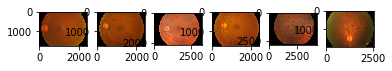

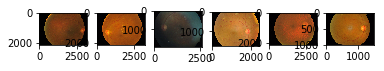

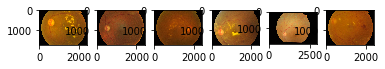

In [24]:
n_diag_cls = train_data.diagnosis.nunique()
n_samples_cls = 6
diag_grps = train_data.groupby('diagnosis')#dict(list(train_data.groupby('diagnosis')))
for name, grp in diag_grps:
    for i in range(6):
        plt.subplot(n_diag_cls, n_samples_cls, i+1)
        imgplot = plt.imshow(mpimg.imread(os.path.join(train_img_path, grp.iloc[i]['id_code']+'.png')))
    plt.show()

Images are rotated. 

In a previous [Diabetic Retinopathy Detection](https://www.kaggle.com/c/diabetic-retinopathy-detection) competetion, this description was written (see [here](https://www.kaggle.com/c/diabetic-retinopathy-detection/data)):


The images in the dataset come from different models and types of cameras, which can affect the visual appearance of left vs. right. Some images are shown as one would see the retina anatomically (macula on the left, optic nerve on the right for the right eye). Others are shown as one would see through a microscope condensing lens (i.e. inverted, as one sees in a typical live eye exam). There are generally two ways to tell if an image is inverted:

    - It is inverted if the macula (the small dark central area) is slightly higher than the midline through the optic nerve. If the macula is lower than the midline of the optic nerve, it's not inverted.
    - If there is a notch on the side of the image (square, triangle, or circle) then it's not inverted. If there is no notch, it's inverted.

Like any real-world data set, you will encounter noise in both the images and labels. Images may contain artifacts, be out of focus, underexposed, or overexposed. A major aim of this competition is to develop robust algorithms that can function in the presence of noise and variation.

# Are all files of same size?

In [25]:
import pandas as pd
sizes = pd.DataFrame({'id_code':[], 'shape':[]})

In [26]:

for i in range(len(train_data)):
    sizes = sizes.append({'id_code':train_data.iloc[i]['id_code'], 'shape':mpimg.imread(os.path.join(train_img_path, train_data.iloc[i]['id_code']+'.png')).shape}, ignore_index=True)
    

In [27]:
sizes.head()

id_code            shape
0  000c1434d8d7  (2136, 3216, 3)
1  001639a390f0  (2136, 3216, 3)
2  0024cdab0c1e  (1736, 2416, 3)
3  002c21358ce6  (1050, 1050, 3)
4  005b95c28852  (1536, 2048, 3)

In [28]:
sizes['shape'].nunique()

17

In [29]:
sizes['shape'].describe()

count                3662
unique                 17
top       (1050, 1050, 3)
freq                  974
Name: shape, dtype: object

In [30]:
sizes['shape'].nunique().values

AttributeError: 'int' object has no attribute 'values'

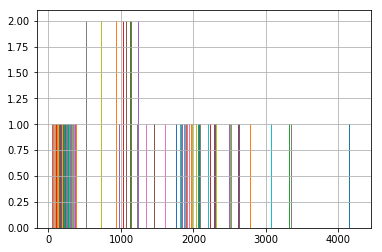

In [31]:
sizes['shape'].hist()